In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from pandas import Series, DataFrame
import numpy.random as rnd
import scipy.stats as st
import os
plt.style.use(os.path.join(os.getcwd(), 'mystyle.mplstyle') )

In [3]:
nvalues = 10
norm_variates = rnd.randn(nvalues)
norm_variates

array([-0.71173873,  0.1246138 , -0.57391894,  0.66244645,  0.45899115,
        0.91404934, -0.97058035, -0.70572998,  0.22801712, -0.57514955])

In [4]:
for i, v in enumerate(sorted(norm_variates), start=1):
    print('{0:2d} {1:+.4f}'.format(i, v))

 1 -0.9706
 2 -0.7117
 3 -0.7057
 4 -0.5751
 5 -0.5739
 6 +0.1246
 7 +0.2280
 8 +0.4590
 9 +0.6624
10 +0.9140


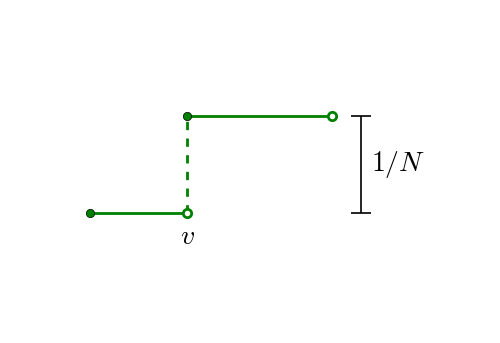

In [5]:
plt.figure()
ax = plt.gca()
ax.axis('off')
plt.plot([1,2],[1,1], lw=2, color='green')
plt.plot([2,2],[1,2], lw=2, color='green', ls='--')
plt.plot([2,3.5],[2,2], lw=2, color='green')
plt.plot(1,1, marker='o', mfc='green')
plt.plot(2,1, marker='o', mfc='white', mec='green', mew=2)
plt.plot(2,2, marker='o', mfc='green')
plt.plot(3.5,2, marker='o', mfc='white', mec='green', mew=2)
plt.text(2.0, 0.9, '$v$', fontsize=20,
         horizontalalignment='center',
         verticalalignment='top')
xx = 3.8
delta = 0.1
plt.plot([xx,xx],[1,2], lw=1.2, color='black')
plt.plot([xx-delta, xx+delta], [1,1], lw=1.2, color='black')
plt.plot([xx-delta, xx+delta], [2,2], lw=1.2, color='black')
plt.text(xx+delta, 1.5, '$1/N$', fontsize=20,
         horizontalalignment='left',
         verticalalignment='center')
plt.axis([0.5,5,0,3]);

In [6]:
def plot_cdf(data, plot_range=None, scale_to=None, **kwargs):
    num_bins= len(data)
    sorted_data = np.array(sorted(data), dtype=np.float64)
    data_range = sorted_data[-1] - sorted_data[0]
    counts, bin_edges = np.histogram(sorted_data, bins=num_bins)
    xvalues = bin_edges[1:]
    yvalues = np.cumsum(counts)
    if plot_range is None:
        xmin = xvalues[0]
        xmax = xvalues[-1]
    else:
        xmin, xmax = plot_range
    # pad the arrays
    xvalues = np.concatenate([[xmin, xvalues[0]], xvalues, [xmax]])
    yvalues = np.concatenate([[0.0, 0.0],        yvalues, [yvalues.max()]])
    if scale_to:
        yvalues = yvalues / len(data) * scale_to
    plt.axis([xmin, xmax, 0, yvalues.max()])
    return plt.step(xvalues, yvalues, **kwargs)

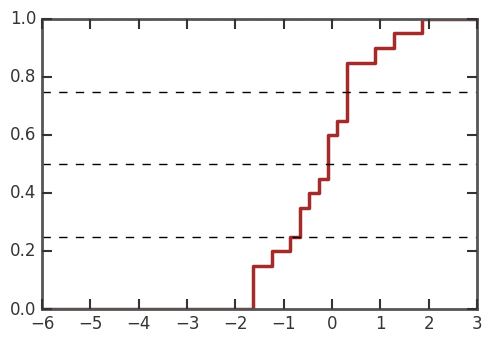

In [7]:
nvalues = 20
#rnd.seed(123) # to get identical results every time
norm_variates = rnd.randn(nvalues)
axes = plot_cdf(norm_variates, plot_range=[-6,3], scale_to=1., 
         lw=2.5, color='Brown')
for v in [0.25, 0.5, 0.75, 1.0]:
    plt.axhline(v, lw=1, ls='--', color='black')

In [8]:
wing_lengths = np.fromfile('data/housefly-wing-lengths.txt', 
                           sep='\n', dtype=np.int64)
wing_lengths

array([36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42,
       42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50,
       50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55], dtype=int64)

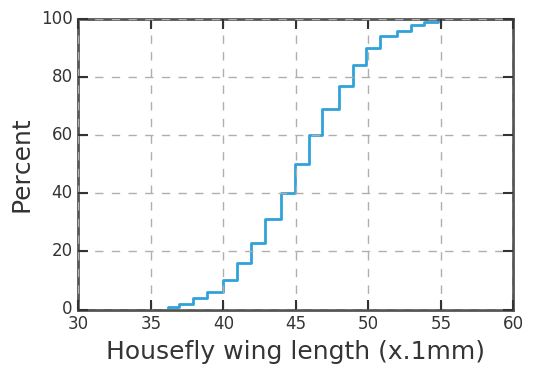

In [9]:
plot_cdf(wing_lengths, plot_range=[30, 60], 
         scale_to=100, lw=2)
plt.grid(lw=1, ls='dashed')
plt.xlabel('Housefly wing length (x.1mm)', fontsize=18)
plt.ylabel('Percent', fontsize=18);

In [10]:
import scipy.stats as st

In [11]:
N = 4857
mean = 63.8
serror = 0.06
sdev = serror * np.sqrt(N)
rvnorm = st.norm(loc=mean, scale=sdev)

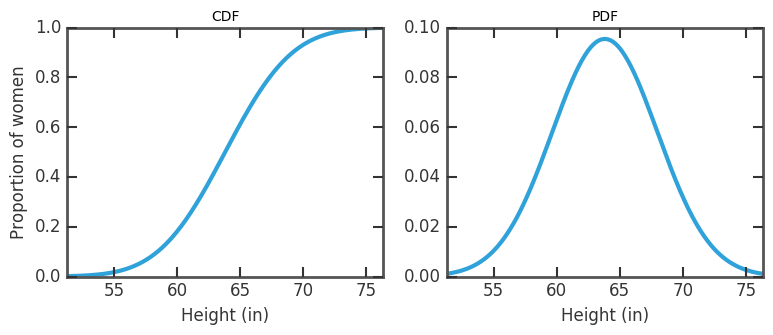

In [12]:
xmin = mean-3*sdev
xmax = mean+3*sdev
xx = np.linspace(xmin,xmax,200)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(xx, rvnorm.cdf(xx))
plt.title('CDF')
plt.xlabel('Height (in)')
plt.ylabel('Proportion of women')
plt.axis([xmin, xmax, 0.0, 1.0])
plt.subplot(1,2,2)
plt.plot(xx, rvnorm.pdf(xx))
plt.title('PDF')
plt.xlabel('Height (in)')
plt.axis([xmin, xmax, 0.0, 0.1]);

In [13]:
rvnorm.cdf(68)

0.84241113338077978

In [14]:
rvnorm.cdf(63)

0.42413842777675442

In [15]:
100*(rvnorm.cdf(68)-rvnorm.cdf(63))
st.rv_continuous.fit?


In [16]:
st.rv_continuous.fit

<function scipy.stats._distn_infrastructure.rv_continuous.fit>

In [17]:
categories = [
    ('Petite', 59, 63),
    ('Average', 63, 68),
    ('Tall', 68, 71),
]
for cat, vmin, vmax in categories:
    percent = 100*(rvnorm.cdf(vmax)-rvnorm.cdf(vmin))
    print('{0:>8s}: {1:.2f}'.format(cat, percent))

  Petite: 29.86
 Average: 41.83
    Tall: 11.50


In [18]:
too_short = 100*rvnorm.cdf(59)
too_tall = 100*(1 - rvnorm.cdf(71))
unclassified = too_short + too_tall
print(too_short, too_tall, unclassified)

12.5503898661 4.25476721471 16.8051570808


In [19]:
a = rvnorm.ppf(0.25)
b = rvnorm.ppf(0.75)
print (a, b)

60.9796003217 66.6203996783


In [20]:
mean, variance, skew, kurtosis = rvnorm.stats(moments='mvks')
print(mean, variance, skew, kurtosis)

63.8 17.485200000000003 0.0 0.0


In [21]:
eta = 1.0
beta = 1.5
rvweib = st.weibull_min(beta, scale=eta)

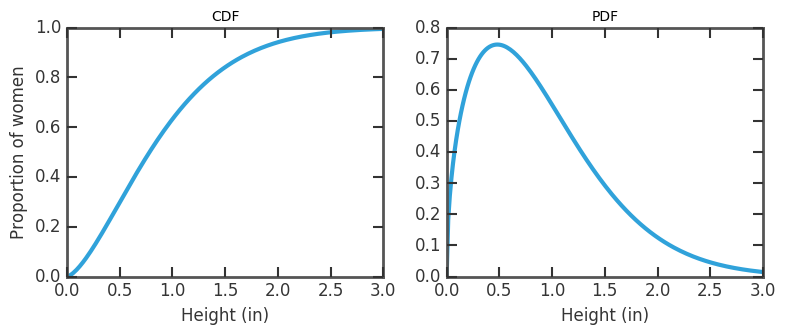

In [22]:
xmin = 0
xmax = 3
xx = np.linspace(xmin,xmax,200)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(xx, rvweib.cdf(xx))
plt.title('CDF')
plt.xlabel('Height (in)')
plt.ylabel('Proportion of women')
plt.subplot(1,2,2)
plt.plot(xx, rvweib.pdf(xx))
plt.title('PDF')
plt.xlabel('Height (in)');

In [23]:
weib_variates = rvweib.rvs(size=500)
print(weib_variates[:10])

[ 0.44833237  0.27041106  0.68346768  0.79574285  2.60261055  0.63391042
  1.04114278  1.43631971  1.43341636  1.28601388]


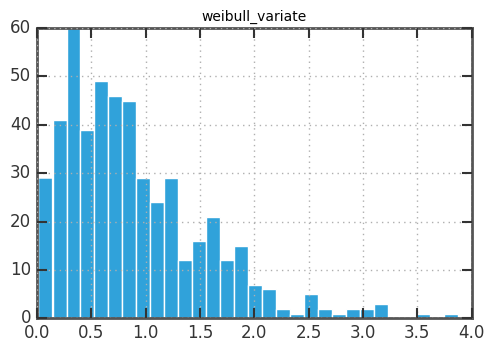

In [24]:
weib_df = DataFrame(weib_variates,columns=['weibull_variate'])
weib_df.hist(bins=30);

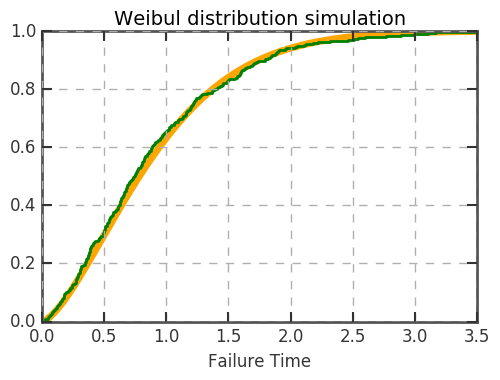

In [25]:
xmin = 0
xmax = 3.5
xx = np.linspace(xmin,xmax,200)
plt.plot(xx, rvweib.cdf(xx), color='orange', lw=5)
plot_cdf(weib_variates, plot_range=[xmin, xmax], scale_to=1, lw=2, color='green')
plt.axis([xmin, xmax, 0, 1])
plt.title('Weibul distribution simulation', fontsize=14)
plt.xlabel('Failure Time', fontsize=12)
plt.grid(lw=1, ls='dashed');

In [26]:
wing_lengths = np.fromfile('data/housefly-wing-lengths.txt', 
                           sep='\n', dtype=np.int64)
mean, std = st.norm.fit(wing_lengths)
print(mean, std)

45.5 3.9


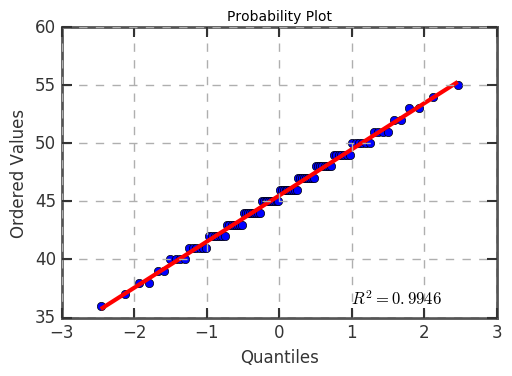

In [27]:
st.probplot(wing_lengths, dist='norm', plot=plt)
plt.grid(lw=1, ls='dashed');

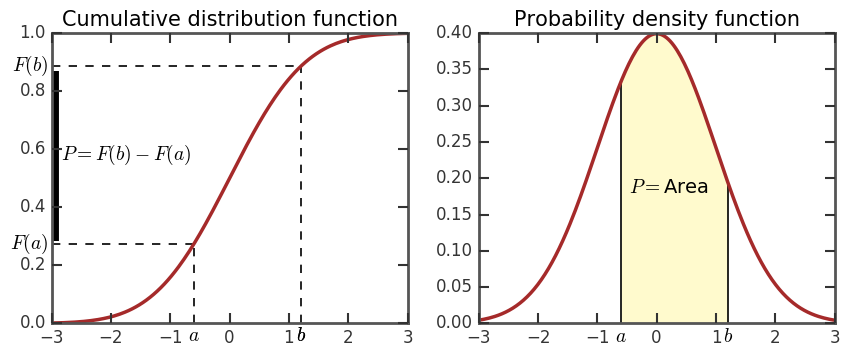

In [28]:
mean=0.0
sdev=1.0
rvnorm = st.norm(loc=mean, scale=sdev)
cdf = rvnorm.cdf
pdf = rvnorm.pdf
a = -.6
b = 1.2
xmin = mean-3*sdev
xmax = mean+3*sdev
xx = np.linspace(xmin,xmax,200)
plt.figure(figsize=(9,3.5))
yy = cdf(xx)
plt.subplot(1,2,1)
plt.title('Cumulative distribution function', fontsize=15)
#plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off') 
#plt.tick_params(axis='y', which='both', left='off', right='off', labelleft='off') 
plt.plot([a,a], [0.0, cdf(a)], lw=1.2, ls='--', color='black')
plt.plot([b,b], [0.0, cdf(b)], lw=1.2, ls='--', color='black')
plt.plot([xmin,a], [cdf(a), cdf(a)], lw=1.2, ls='--', color='black')
plt.plot([xmin,b], [cdf(b), cdf(b)], lw=1.2, ls='--', color='black')
plt.plot(xx, yy, color='Brown', lw=2.5)
plt.plot([xmin, xmin], [cdf(a)+0.01, cdf(b)-0.015], lw=10, color='black')
plt.text(a, -0.06, '$a$', fontsize=14, horizontalalignment='center')
plt.text(b, -0.06, '$b$', fontsize=14, horizontalalignment='center')
plt.text(xmin-0.06, cdf(a), '$F(a)$', fontsize=14, 
         horizontalalignment='right', verticalalignment='center')
plt.text(xmin-0.06, cdf(b), '$F(b)$', fontsize=14, 
         horizontalalignment='right', verticalalignment='center')
plt.text(b, -0.06, '$b$', fontsize=14, horizontalalignment='center')
plt.text(xmin+0.15, 0.5*(cdf(a)+cdf(b)), '$P=F(b)-F(a)$', fontsize=14,
         verticalalignment='center')
yy = pdf(xx)
plt.subplot(1,2,2)
plt.title('Probability density function', fontsize=15)
#plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off') 
#plt.tick_params(axis='y', which='both', left='off', right='off', labelleft='off') 
plt.plot([a, a], [0.0, pdf(a)], lw=1.2, color='black')
plt.plot([b, b], [0.0, pdf(b)], lw=1.2, color='black')
plt.fill_between(xx, yy, where=(a<=xx) & (xx<=b), color='LemonChiffon')
plt.text(a, -0.025, '$a$', fontsize=14, horizontalalignment='center')
plt.text(b, -0.025, '$b$', fontsize=14, horizontalalignment='center')
plt.text(0.5*(a+b)-.1, 0.2, '$P=$Area', fontsize=14,
         horizontalalignment='center',
         verticalalignment='top')
plt.plot(xx, yy, color='Brown', lw=2.5);

In [29]:
N = 20
p = 0.5
rv_binom = st.binom(N, p)

In [30]:
rv_binom.pmf(12)

0.12013435363769531

In [31]:
rv_binom.cdf(7)

0.13158798217773435

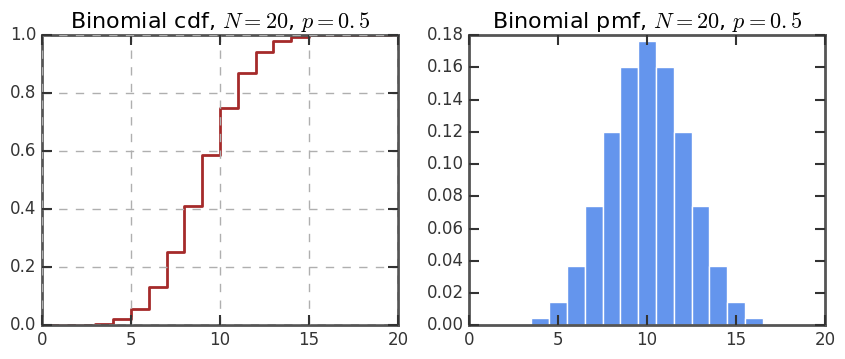

In [32]:
xx = np.arange(N+1)
cdf = rv_binom.cdf(xx)
pmf = rv_binom.pmf(xx)
xvalues = np.arange(N+1)
plt.figure(figsize=(9,3.5))
plt.subplot(1,2,1)
plt.step(xvalues, cdf,  lw=2, color='brown')
plt.grid(lw=1, ls='dashed')
plt.title('Binomial cdf, $N=20$, $p=0.5$', fontsize=16)
plt.subplot(1,2,2)
left = xx - 0.5
plt.bar(left, pmf, 1.0, color='CornflowerBlue')
plt.title('Binomial pmf, $N=20$, $p=0.5$', fontsize=16)
plt.axis([0, 20, 0, .18]);

In [33]:
mean = rv_binom.mean()
std = rv_binom.std()
print(mean, std)

10.0 2.2360679775


In [34]:
mean = N*p
std = np.sqrt(N*p*(1-p))
print(mean, std)

10.0 2.2360679775


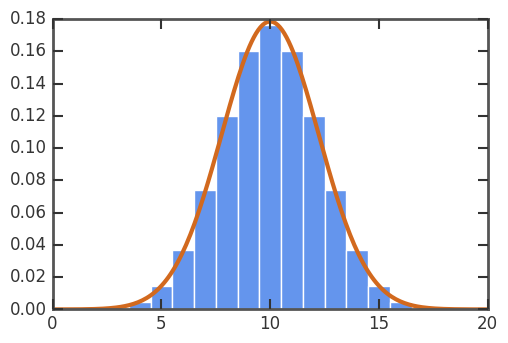

In [35]:
rvnorm = st.norm(loc=mean, scale=std)
pdf = rvnorm.pdf
xx = np.linspace(0, 20, 200)
yy = pdf(xx)
plt.plot(xx,yy, linewidth=3.
, color='Chocolate')
xx = np.arange(N+1)
pmf = rv_binom.pmf(xx)
left = xx - 0.5
plt.bar(left, pmf, 1.0, color='CornflowerBlue')
rvnorm = st.norm(loc=mean, scale=std)
plt.axis([0,20,0,.18]);

In [36]:
import scipy.stats as st
binorm_variates = st.multivariate_normal.rvs(mean=[0,0], size=300)
df = DataFrame(binorm_variates, columns=['Z1', 'Z2'])
df.head(10)

Z1        Z2
0  1.560631 -0.413252
1  0.289626 -0.385725
2 -0.148560  1.269293
3  1.718710  0.186176
4 -1.137862 -0.527625
5  0.138914 -0.386967
6  0.918425 -1.317755
7  0.345194  1.519279
8 -0.747843 -0.072082
9  1.014365 -0.850468

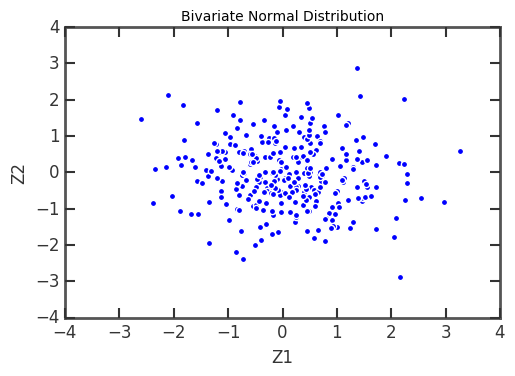

In [37]:
df.plot(kind='scatter', x='Z1', y='Z2')
plt.title('Bivariate Normal Distribution')
plt.axis([-4,4,-4,4]);